In [ ]:
import nltk
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from urllib.request import urlopen
import re
import inflect
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist
from collections import Counter
nltk.download('brown')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
def read_book(url):
    return urlopen(url).read()
def to_lower(text):
    return text.lower()
def decode_book(book):
    return book.decode('utf-8')
def remove_urls(text):
    return re.sub(r"http\S+", "", text)
def print_title_len(book):
    print(book[:80],len(book))
def remove_unwanted_part (text):
    fstart = text.find('START')
    fend = text.find('END')
    print("Discarding Before - ", fstart)
    print("Discarding After - ", fend)
    text = text[fstart:fend]
    return text

In [ ]:
def decontract(text):
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    return text

p = inflect.engine() #singularizes plural English word
def numbers_to_words(text):
    list_of_words = text.split()
    modified_text = []

    for num in list_of_words:
        if num.isdigit():
            number_to_word = p.number_to_words(num)
            modified_text.append(number_to_word)
        else:
            modified_text.append(num)
      
    return ' '.join(modified_text)

In [ ]:
def remove_punctuation(text):
    tokens = word_tokenize(text)
    words = [word for word in tokens if word.isalpha()]
    return ' '.join(words)

lemmatizer = WordNetLemmatizer() # to lemmatize, preferring lemmmatizing over stemming
def lemmatize_word(text): 
    token_word = word_tokenize(text)  
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in token_word] 
    return ' '.join(lemmas)

In [ ]:
url_book1 = 'https://www.gutenberg.org/files/66975/66975-0.txt'
url_book2 = 'https://www.gutenberg.org/files/66744/66744-0.txt'

def PreProcessBook(url):
    book = read_book(url)
    print_title_len(book)
    text = decode_book(book)
    text = remove_unwanted_part(text)
    text = to_lower(text)
    text = remove_urls(text)
    text = decontract(text)
    text = numbers_to_words(text)
    text = remove_punctuation(text)
    text = lemmatize_word(text)
    return (text)

In [ ]:
book1_text = PreProcessBook(url_book1)
book2_text = PreProcessBook(url_book2)

b'\xef\xbb\xbfThe Project Gutenberg eBook of The Secret of Toni, by Molly Elliot\r\nSeawell\r\n' 410858
Discarding Before -  810
Discarding After -  379187
b'\xef\xbb\xbfThe Project Gutenberg eBook of The Life of the Scorpion, by Jean-Henri\r\nFabre' 393185
Discarding Before -  1050
Discarding After -  373241


In [ ]:
def noun(text):
    is_noun = lambda pos: pos[:1] == 'N'
    tokenized = nltk.word_tokenize(text)
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
    return nouns
 
noun1=noun(book1_text)
noun2=noun(book2_text)
print("Number of nouns in book 1 and book 2 respectively are "+ str(len(noun1))+" and "+ str(len(noun2)))

Number of nouns in book 1 and book 2 respectively are 15340 and 15888


In [ ]:
def verb(text):
    is_verb = lambda pos: pos[:1] == 'V'
    tokenized = nltk.word_tokenize(text)
    verbs = [word for (word, pos) in nltk.pos_tag(tokenized) if is_verb(pos)] 
    return verbs

In [ ]:
verb1=verb(book1_text)
verb2=verb(book2_text)
print("Number of verbs in book 1 and book 2 respectively are "+ str(len(verb1))+" and "+ str(len(verb2)))

Number of verbs in book 1 and book 2 respectively are 12146 and 8664


In [ ]:
from nltk.corpus import wordnet as wn

In [ ]:
#gives the categories of nouns or verb that the word belongs to
from nltk.corpus import wordnet as wn
def synset(words):
    categories=[]
    for word in words:
        cat=[]
        for synset in wn.synsets(word):
            if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
                cat.append(synset.lexname())
            if('verb' in synset.lexname()):
                cat.append(synset.lexname())
            categories.append(cat)
    return categories

In [ ]:
noun_syn1=synset(noun1)
noun_syn2=synset(noun2)
verb_syn1=synset(verb1)
verb_syn2=synset(verb2)

In [ ]:
print(noun1[35])

illustrate


In [ ]:

print(noun_syn1[35][:])

['noun.act', 'noun.cognition', 'verb.communication', 'verb.stative', 'verb.contact', 'verb.perception', 'verb.perception', 'verb.creation', 'verb.creation', 'verb.cognition', 'verb.creation', 'verb.creation', 'verb.contact', 'verb.cognition']


In [ ]:
#GIVES TOTAL NOUN LEXNAMES AND TOTAL VERB LEXNAMES FOR FREQUENCY DISTRIBUTIONS
def all_synsets(no,ve):
    nouns=[]
    verbs=[]
    for word in no:
        for synset in wn.synsets(word): 
            if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
                nouns.append(synset.lexname())
            if('verb' in synset.lexname()):
                verbs.append(synset.lexname())
    for word in ve:
        for synset in wn.synsets(word): 
            if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
                    nouns.append(synset.lexname())
            if('verb' in synset.lexname()):
                    verbs.append(synset.lexname())
      
    return nouns,verbs

In [ ]:
noun_superset1,verb_superset1=all_synsets(noun1,verb1)
noun_superset2,verb_superset2=all_synsets(noun2,verb2)

In [ ]:
len(noun_superset1)

86954

In [ ]:
print(noun_superset1)

['noun.event', 'noun.time', 'noun.act', 'noun.act', 'noun.act', 'noun.location', 'noun.communication', 'noun.attribute', 'noun.act', 'noun.cognition', 'noun.person', 'noun.communication', 'noun.communication', 'noun.cognition', 'noun.event', 'noun.state', 'noun.attribute', 'noun.communication', 'noun.communication', 'noun.communication', 'noun.person', 'noun.person', 'noun.person', 'noun.person', 'noun.person', 'noun.person', 'noun.person', 'noun.person', 'noun.location', 'noun.group', 'noun.group', 'noun.state', 'noun.group', 'noun.person', 'noun.group', 'noun.group', 'noun.group', 'noun.group', 'noun.group', 'noun.communication', 'noun.person', 'noun.location', 'noun.group', 'noun.group', 'noun.state', 'noun.group', 'noun.person', 'noun.group', 'noun.group', 'noun.group', 'noun.group', 'noun.person', 'noun.event', 'noun.communication', 'noun.communication', 'noun.artifact', 'noun.communication', 'noun.communication', 'noun.possession', 'noun.group', 'noun.group', 'noun.communication'

([<matplotlib.axis.XTick at 0x7f7b8dbaae50>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '17'),
  Text(0, 0, '18'),
  Text(0, 0, '19'),
  Text(0, 0, '20'),
  Text(0, 0, '21'),
  Text(0, 0, '22'),
  Text(0, 0, '23'),
  Text(0, 0, '24')])

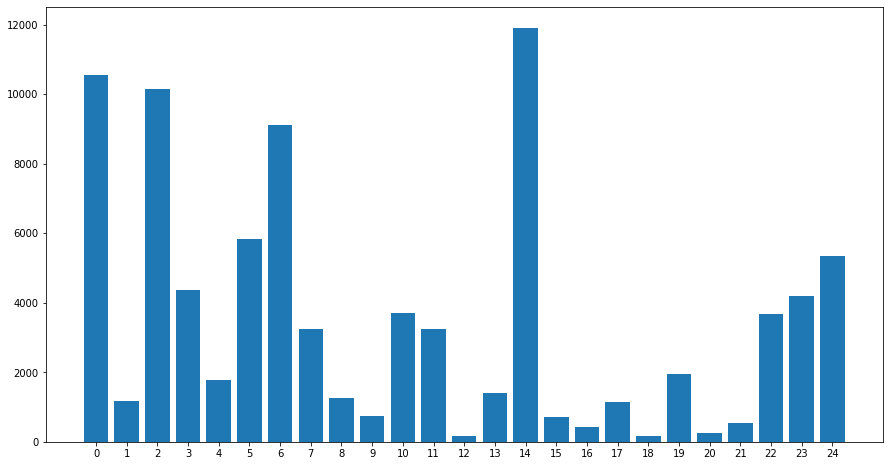

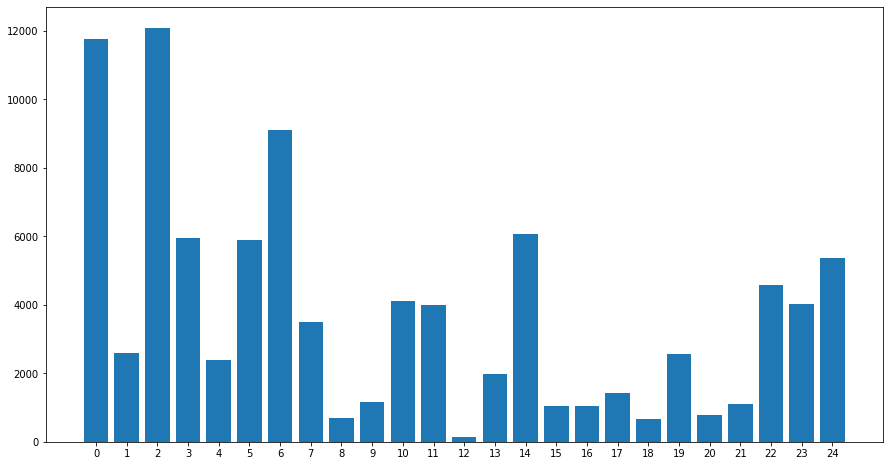

In [ ]:
import numpy as np
labels, counts = np.unique(noun_superset1,return_counts=True)
import matplotlib.pyplot as plt 
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))
labels, counts = np.unique(noun_superset2,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))

In [ ]:
print(labels)

['noun.act' 'noun.animal' 'noun.artifact' 'noun.attribute' 'noun.body'
 'noun.cognition' 'noun.communication' 'noun.event' 'noun.feeling'
 'noun.food' 'noun.group' 'noun.location' 'noun.motive' 'noun.object'
 'noun.person' 'noun.phenomenon' 'noun.plant' 'noun.possession'
 'noun.process' 'noun.quantity' 'noun.relation' 'noun.shape' 'noun.state'
 'noun.substance' 'noun.time']


([<matplotlib.axis.XTick at 0x7f7b98023910>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14')])

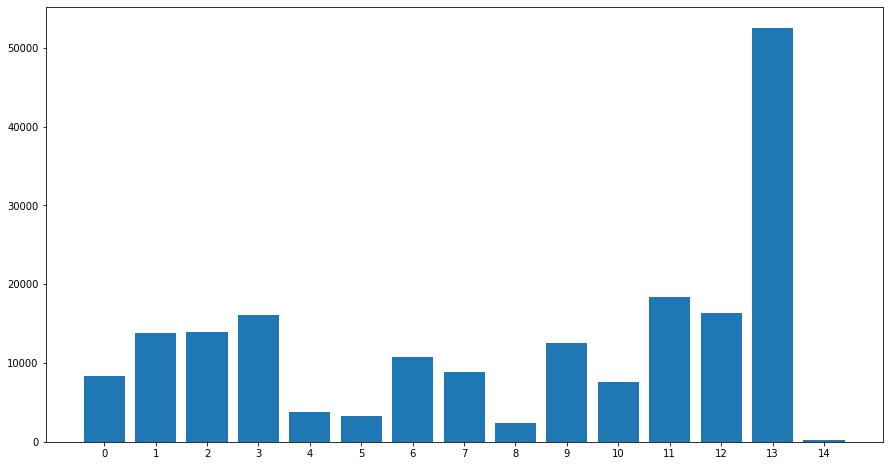

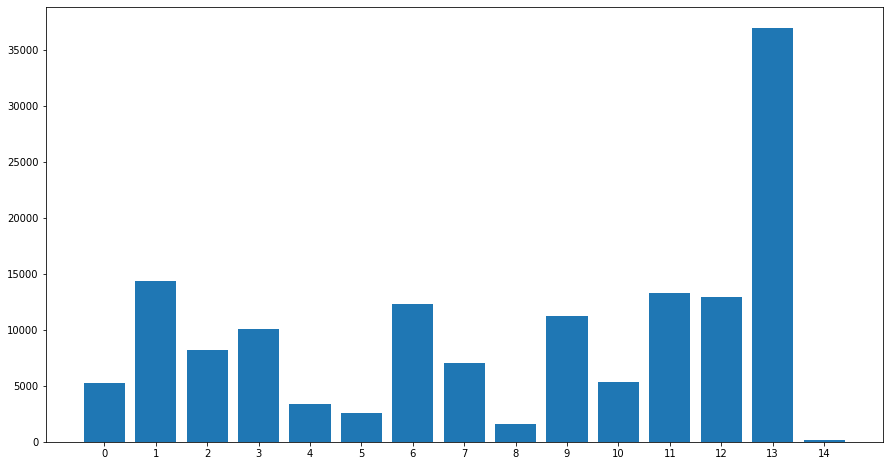

In [ ]:
labels, counts = np.unique(verb_superset1,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))
labels, counts = np.unique(verb_superset2,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
doc1 = nlp(book1_text)
doc2 = nlp(book2_text)
print("there are total "+str(len(doc1.ents))+" entities in book 1 and "+str(len(doc2.ents))+" in book 2")

there are total 2145 entities in book 1 and 1178 in book 2


In [ ]:
book1_text

'start of the project gutenberg ebook the secret of toni secret toni molly elliot seawell of the victory the sprightly romance of marsac the château of montplaisir illustrate by george brehm appleton and company new york mcmvii copyright by appleton and company february miss seawell be book château of montplaisir illustrate cloth the victory illustrate cloth young heroes of the navy series midshipman paulding illustrate cloth little jarvis illustrate cloth paul jones illustrate cloth decatur and somers illustrate cloth appleton and company new york illustration stand there gnaw his mustache page list of illustrations face page stand there gnaw his mustache not dare so much as to lift her eye to the altar fifty tell him to go home to his mother and tell her that she have an ass for a son give denise two whole stick of candy one hundred and two have their last interview in the little cranny on the bridge one hundred and fourteen toni take out a single franc one hundred and do his special

In [ ]:
print([(X, X.ent_iob_) for X in doc1])

[(start, 'O'), (of, 'O'), (the, 'O'), (project, 'O'), (gutenberg, 'O'), (ebook, 'O'), (the, 'O'), (secret, 'O'), (of, 'O'), (toni, 'B'), (secret, 'I'), (toni, 'I'), (molly, 'I'), (elliot, 'I'), (seawell, 'I'), (of, 'O'), (the, 'O'), (victory, 'O'), (the, 'O'), (sprightly, 'O'), (romance, 'O'), (of, 'O'), (marsac, 'O'), (the, 'O'), (château, 'O'), (of, 'O'), (montplaisir, 'O'), (illustrate, 'O'), (by, 'O'), (george, 'B'), (brehm, 'I'), (appleton, 'I'), (and, 'O'), (company, 'O'), (new, 'B'), (york, 'I'), (mcmvii, 'O'), (copyright, 'O'), (by, 'O'), (appleton, 'B'), (and, 'O'), (company, 'O'), (february, 'B'), (miss, 'O'), (seawell, 'B'), (be, 'I'), (book, 'I'), (château, 'I'), (of, 'I'), (montplaisir, 'I'), (illustrate, 'O'), (cloth, 'O'), (the, 'O'), (victory, 'O'), (illustrate, 'O'), (cloth, 'O'), (young, 'O'), (heroes, 'O'), (of, 'O'), (the, 'O'), (navy, 'B'), (series, 'O'), (midshipman, 'O'), (paulding, 'O'), (illustrate, 'O'), (cloth, 'O'), (little, 'O'), (jarvis, 'B'), (illustrate,

In [ ]:
print([(X, X.ent_iob_) for X in doc2])

[(start, 'O'), (of, 'O'), (the, 'O'), (project, 'O'), (gutenberg, 'O'), (ebook, 'O'), (the, 'O'), (life, 'O'), (of, 'O'), (the, 'O'), (scorpion, 'O'), (the, 'O'), (life, 'O'), (of, 'O'), (the, 'O'), (scorpion, 'O'), (by, 'O'), (henri, 'B'), (fabre, 'I'), (translate, 'O'), (by, 'O'), (alexander, 'B'), (teixeira, 'I'), (de, 'I'), (mattos, 'I'), (fellow, 'I'), (of, 'O'), (zoological, 'O'), (society, 'O'), (of, 'O'), (london, 'B'), (and, 'O'), (bernard, 'B'), (miall, 'I'), (new, 'B'), (york, 'I'), (dodd, 'O'), (mead, 'O'), (and, 'O'), (company, 'O'), (one, 'O'), (thousand, 'O'), (nine, 'O'), (hundred, 'O'), (and, 'O'), (content, 'O'), (chapter, 'O'), (page, 'O'), (i, 'O'), (the, 'O'), (languedocian, 'O'), (scorpion, 'O'), (the, 'O'), (dwell, 'O'), (three, 'B'), (ii, 'O'), (the, 'O'), (languedocian, 'O'), (scorpion, 'O'), (food, 'O'), (thirty, 'B'), (iii, 'O'), (the, 'O'), (languedocian, 'B'), (scorpion, 'O'), (the, 'O'), (poison, 'O'), (iv, 'O'), (the, 'O'), (languedocian, 'B'), (scorpion,

In [ ]:
def entity_recognition(text):
  doc=nlp(text)
  person=[]
  org=[]
  location=[]
  for X in doc:  
    if (X.ent_type_=='PERSON') and X.text not in person:
      person.append(X.text)
    if (X.ent_type_=='ORG')and X.text not in org:
      org.append(X.text)
    if ((X.ent_type_=='LOC') or (X.ent_type_=='GPE')) and X.text not in location:
      location.append(X.text)
  return person,org,location


In [ ]:
person1,org1,location1=entity_recognition(book1_text)
person2,org2,location2=entity_recognition(book2_text)
print("number of person entities in book 1 and book 2 respectively are "+str(len(person1))+" and "+str(len(person2)))
print("number of organization entities in book 1 and book 2 respectively are "+str(len(org1))+" and "+str(len(org2)))
print("number of location entities in book 1 and book 2 respectively are "+str(len(location1))+" and "+str(len(location2)))


number of person entities in book 1 and book 2 respectively are 173 and 92
number of organization entities in book 1 and book 2 respectively are 34 and 49
number of location entities in book 1 and book 2 respectively are 38 and 29


In [ ]:
print(org1)

['seawell', 'be', 'book', 'château', 'of', 'montplaisir', 'navy', 'the', 'house', 'marcel', 'candy', 'manufacturer', 'acacia', 'hermann', 'lean', 'press', 'public', 'opinion', 'mantel', 'stairs', 'spangle', 'paul', 'verney', 'recruit', 'blond', 'mustache', 'brood', 'army', 'fro', 'fox', 'mantle', 'red', 'sanctuary', 'lamp']


In [ ]:
def freq(str_list): 
    unique_words = set(str_list)
    counts = {}
    for words in unique_words : 
        counts[words] = str_list.count(words)
    return counts

In [ ]:
X = freq(org1)
print(sorted(X.items(),key = lambda kv:(kv[1],kv[0]),reverse=True))

NameError: ignored

In [ ]:
X = freq(person1)
print(sorted(X.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) 

[('yap', 1), ('xxi', 1), ('xx', 1), ('xviii', 1), ('xix', 1), ('xi', 1), ('wonderfully', 1), ('whisper', 1), ('whirl', 1), ('warn', 1), ('waltz', 1), ('walk', 1), ('vi', 1), ('verney', 1), ('urge', 1), ('turn', 1), ('tree', 1), ('toni', 1), ('tom', 1), ('throat', 1), ('the', 1), ('terrier', 1), ('surreptitiously', 1), ('sun', 1), ('stow', 1), ('speak', 1), ('sophie', 1), ('slap', 1), ('sit', 1), ('sigh', 1), ('shin', 1), ('shake', 1), ('shabby', 1), ('secret', 1), ('seawell', 1), ('seat', 1), ('scowl', 1), ('scamper', 1), ('saucy', 1), ('salute', 1), ('rise', 1), ('reply', 1), ('red', 1), ('quite', 1), ('quarrel', 1), ('proud', 1), ('pouf', 1), ('portmanteau', 1), ('pierre', 1), ('phaeton', 1), ('peer', 1), ('pearl', 1), ('paul', 1), ('pass', 1), ('pardon', 1), ('papa', 1), ('owe', 1), ('nod', 1), ('nicolas', 1), ('mustaches', 1), ('murmur', 1), ('murat', 1), ('moon', 1), ('monsieur', 1), ('molly', 1), ('miles', 1), ('merry', 1), ('merrilat', 1), ('melancholy', 1), ('marry', 1), ('mari

In [ ]:
X = freq(location1)
print(sorted(X.items(), key = lambda kv:(kv[1], kv[0]),reverse=True))

[('york', 1), ('us', 1), ('toni', 1), ('the', 1), ('south', 1), ('russia', 1), ('prance', 1), ('paul', 1), ('paris', 1), ('of', 1), ('nosegay', 1), ('nicolas', 1), ('new', 1), ('mustached', 1), ('meadow', 1), ('marry', 1), ('mantelpiece', 1), ('mademoiselle', 1), ('madame', 1), ('lodge', 1), ('hungary', 1), ('gulf', 1), ('france', 1), ('flagstones', 1), ('eden', 1), ('earth', 1), ('dragoon', 1), ('delorme', 1), ('cudgel', 1), ('château', 1), ('bienville', 1), ('beaupré', 1), ('bay', 1), ('basin', 1), ('appleton', 1), ('america', 1), ('algeria', 1), ('africa', 1)]


In [ ]:

sample_book_1_1='Jacques told Toni long stories about that cold place called Russia'
sample_book_1_2='Toni knew that there was another place very hot called Algeria'
sample_book_1_3='Toni also found another use for Jacques'
sample_book_1_4='Denise was as correct as Toni was incorrect'

In [ ]:
hand_labeled_book_1_1=['PER', 'O','PER','O','O','O','O','O','O','O','LOC']
hand_labeled_book_1_2=['PER','O','O','O','O','O','O','O','O','O','LOC']
hand_labeled_book_1_3=['PER','O','O','O','O','O','PER']
hand_labeled_book_1_4=['PER', 'O', 'O', 'O', 'O', 'PER', 'O', 'O']

In [ ]:
labels_book_1_1=([(X.text) for X in nlp(sample_book_1_1).ents])
labels_book_1_2=([(X.text) for X in nlp(sample_book_1_2).ents])
labels_book_1_3=([(X.text) for X in nlp(sample_book_1_3).ents])
labels_book_1_4=([(X.text) for X in nlp(sample_book_1_4).ents])

In [ ]:
from typing import List, Dict, Sequence

class Matrics:
    def __init__ (self, sents_true_labels: Sequence[Sequence[Dict]], sents_pred_labels:Sequence[Sequence[Dict]]):
        self.sents_true_labels= sents_true_labels
        self.sents_pred_labels= sents_pred_labels
        self.types=set(entity['type'] for sents in sents_true_labels for entity in sents)
        self.confusion_matrices={type:{'TP':0, 'TN':0, 'FP':0, 'FN':0} for type in self.types}
        self.scores={type: {'p':0, 'r':0, 'f1':0} for type in self.types}

    def cal_confusion_matrices(self) -> Dict[str, Dict]:
        #Calculate confusion matrices for all sentences
        for true_labels, pred_labels in zip(self.sents_true_labels, self.sents_pred_labels):
            for true_label in true_labels:
                entity_type=true_label['type']
                prediction_hit_count=0
                for pred_label in pred_labels:
                    if pred_label['type'] != entity_type:
                        continue
                    if pred_label['start_idx']== true_label['start_idx'] and pred_label['end_idx'] == true_label['end_idx'] and pred_label['text']==true_label['text']:
                        self.confusion_matrices[entity_type]['TP'] +=1
                        prediction_hit_count+=1
                    elif ((pred_label['start_idx']==true_label['start_idx']) or (pred_label['end_idx']==true_label['end_idx'])) and pred_label['text'] != true_label['text']:
                        self.confusion_matrices[entity_type]['FP'] +=1
                        self.confusion_matrices[entity_type]['FN'] +=1
                        prediction_hit_count +=1
                if prediction_hit_count != 1:
                    self.confusion_matrices[entity_type]['FN'] +=1
                prediction_hit_count=0

In [ ]:
def cal_scores(self) -> Dict[str, Dict]:
    #Calculating precision, recall, F1 
    confusion_matrices =self.confusion_matrices 
    scores= {type: {'p':0, 'r':0, 'f1':0} for type in self.types}

    for entity_type, confusion_matrix in confusion_matrices.items():
        if confusion_matrix['TP']==0 and confusion_matrix['FP']==0:
            scores[entity_type]['p']=0
        else:
            scores[entity_type]['p']= confusion_matrix['TP']/(confusion_matrix['TP']+ confusion_matrix['FP'])

        if confusion_matrix['TP']==0 and confusion_matrix['FN']==0:
            scores[entity_type]['r']=0

        else:
            scores[entity_type]['r']= confusion_matrix['TP']/(confusion_matrix['TP']+ confusion_matrix['FN'])
        
        if scores[entity_type]['p'] ==0 or scores[entity_type]['r']==0:
            scores[entity_type]['f1']=0
        else:
            scores[entity_type]['f1'] =2*scores[entity_type]['p']*scores[entity_type]['r']/ (scores[entity_type]['p']+ scores['entity_type']['r'])
    self.scores=scores

In [ ]:
for x in range(len(labels_book_1_1)):
    if (labels_book_1_1[x]=='') or (not ['ORG', 'LOC', 'GPE', 'PER']) :
        labels_book_1_1[x]='O'
for x in range(len(labels_book_1_2)):
    if (labels_book_1_2[x]=='') or (not ['ORG', 'LOC', 'GPE', 'PER']) :
        labels_book_1_2[x]='O'
for x in range(len(labels_book_1_3)):
    if (labels_book_1_3[x]=='') or (not ['ORG', 'LOC', 'GPE', 'PER']) :
        labels_book_1_3[x]='O'
for x in range(len(labels_book_1_4)):
    if (labels_book_1_4[x]=='') or (not ['ORG', 'LOC', 'GPE', 'PER']) :
        labels_book_1_4[x]='O'

    # similarly for book_1_2 ...


In [ ]:
url_book1 = 'https://www.gutenberg.org/files/66975/66975-0.txt'
url_book2 = 'https://www.gutenberg.org/files/66744/66744-0.txt'
url_book3 = 'https://www.gutenberg.org/files/66979/66979-0.txt'
def PreProcessBook_l(url):
    book = read_book(url)
    print_title_len(book)
    text = decode_book(book)
    text = remove_unwanted_part(text)
    text = to_lower(text)
    text = remove_urls(text)
    text = decontract(text)
    text = numbers_to_words(text)
    text = remove_punctuation(text)
    return (text)

book1=PreProcessBook_l(url_book1)
book2=PreProcessBook_l(url_book2)
book3=PreProcessBook_l(url_book3)

b'\xef\xbb\xbfThe Project Gutenberg eBook of The Secret of Toni, by Molly Elliot\r\nSeawell\r\n' 410858
Discarding Before -  810
Discarding After -  379187
b'\xef\xbb\xbfThe Project Gutenberg eBook of The Life of the Scorpion, by Jean-Henri\r\nFabre' 393185
Discarding Before -  1050
Discarding After -  373241
b'\xef\xbb\xbfThe Project Gutenberg eBook of Tristana, by Benito P\xc3\xa9rez Gald\xc3\xb3s\r\n\r\nThis eBo' 335427
Discarding Before -  950
Discarding After -  309508


In [ ]:
corpus=[book1, book2, book3]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
text_matrix= vectorizer.fit_transform(corpus)
print(text_matrix.toarray())
tokens = vectorizer.get_feature_names()

[[0.00023341 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00065417 ... 0.         0.         0.        ]
 [0.         0.00105648 0.         ... 0.00158472 0.00026412 0.00052824]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import pandas as pd

def create_dataframe(matrix, tokens):

    doc_names = [f'doc_{i+1}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

df=create_dataframe(text_matrix.toarray(),tokens)
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df, df))

[[1.         0.77182532 0.00948256]
 [0.77182532 1.         0.00830394]
 [0.00948256 0.00830394 1.        ]]


In [ ]:
book1_f=PreProcessBook(url_book1)
book2_f=PreProcessBook(url_book2)
book3_f=PreProcessBook(url_book3)

b'\xef\xbb\xbfThe Project Gutenberg eBook of The Secret of Toni, by Molly Elliot\r\nSeawell\r\n' 410858
Discarding Before -  810
Discarding After -  379187
b'\xef\xbb\xbfThe Project Gutenberg eBook of The Life of the Scorpion, by Jean-Henri\r\nFabre' 393185
Discarding Before -  1050
Discarding After -  373241
b'\xef\xbb\xbfThe Project Gutenberg eBook of Tristana, by Benito P\xc3\xa9rez Gald\xc3\xb3s\r\n\r\nThis eBo' 335427
Discarding Before -  950
Discarding After -  309508


In [ ]:
corpus=[book1_f, book2_f, book3_f]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_f = TfidfVectorizer()
text_matrix_f= vectorizer_f.fit_transform(corpus)
print(text_matrix_f.toarray())
tokens_f = vectorizer_f.get_feature_names()

[[0.00022034 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00213854 ... 0.         0.         0.        ]
 [0.         0.00105646 0.         ... 0.00158469 0.00026412 0.00052823]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import pandas as pd

def create_dataframe(matrix, tokens):

    doc_names = [f'doc_{i+1}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

df_f=create_dataframe(text_matrix_f.toarray(),tokens_f)
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df_f, df_f))

[[1.         0.80200361 0.01019633]
 [0.80200361 1.         0.00872823]
 [0.01019633 0.00872823 1.        ]]
